# Hello, Machine Learning!
In this chapter, I'll be implementing basic classification ML algorithms on MNIST dataset

## Getting the data!

In [2]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', as_frame=False)
mnist

{'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], shape=(70000, 784)),
 'target': array(['5', '0', '4', ..., '4', '5', '6'], shape=(70000,), dtype=object),
 'frame': None,
 'categories': {'class': ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']},
 'feature_names': ['pixel1',
  'pixel2',
  'pixel3',
  'pixel4',
  'pixel5',
  'pixel6',
  'pixel7',
  'pixel8',
  'pixel9',
  'pixel10',
  'pixel11',
  'pixel12',
  'pixel13',
  'pixel14',
  'pixel15',
  'pixel16',
  'pixel17',
  'pixel18',
  'pixel19',
  'pixel20',
  'pixel21',
  'pixel22',
  'pixel23',
  'pixel24',
  'pixel25',
  'pixel26',
  'pixel27',
  'pixel28',
  'pixel29',
  'pixel30',
  'pixel31',
  'pixel32',
  'pixel33',
  'pixel34',
  'pixel35',
  'pixel36',
  'pixel37',
  'pixel38',
  'pixel39',
  'pixel40',
  'pixel41',
  'pixel42',
  'pixel43',
  'pixel44',


### Before anything, split the data into train and test!

In [3]:
TRAIN_SIZE = 60000
TEST_SIZE = 10000

train_x = mnist['data'][:TRAIN_SIZE]
train_y = mnist['target'][:TRAIN_SIZE]

test_x = mnist['data'][TRAIN_SIZE:]
test_y = mnist['target'][TRAIN_SIZE:]

print(f'{len(train_x) = }; {len(train_y) = }; {len(test_x) = }; {len(test_y) = }')

len(train_x) = 60000; len(train_y) = 60000; len(test_x) = 10000; len(test_y) = 10000


### Visualize the data

In [4]:
train_x.shape

(60000, 784)

In [5]:
import matplotlib.pyplot as plt

def plot_digit(img):
    image = img.reshape(28, 28)
    plt.figure(figsize=(2, 2))
    plt.imshow(image, cmap='binary')
    plt.axis('off')


5


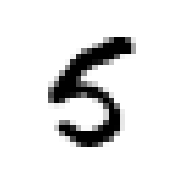

In [6]:
import random

random_ind = random.randint(0, TRAIN_SIZE)

random_img, label = train_x[random_ind], train_y[random_ind]
plot_digit(random_img)
print(label)

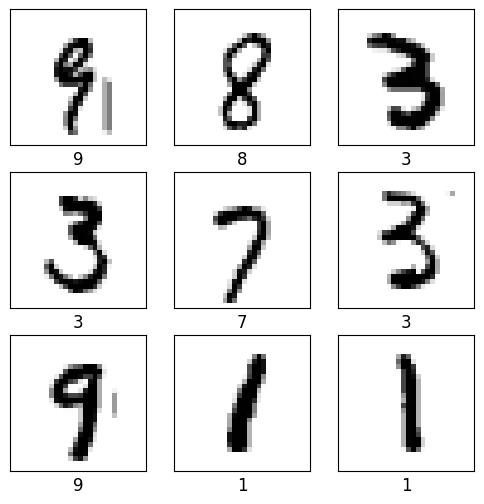

In [7]:
rows = 3
cols = 3

fig, axs = plt.subplots(rows, cols, figsize=(6, 6))
for i, ax in enumerate(axs.flat):
    index = random.randint(0, TRAIN_SIZE)
    img, label = train_x[index], train_y[index]
    img = img.reshape(28, 28)

    ax.imshow(img, cmap='binary')
    ax.set_title(label, y=-0.2)
    ax.set_xticks([])
    ax.set_yticks([])
    
plt.show()

## Training a Binary Classifier
We'll train a classifier with 2 categories: 5 and not-5

In [8]:
train_y_5 = (train_y == '5')
test_y_5 = (test_y == '5')

In [9]:
print(len(train_y_5))
print(len(train_x))

60000
60000


In [10]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(train_x, train_y_5)

SGDClassifier(random_state=42)

is_5: False, pred_is_5: False


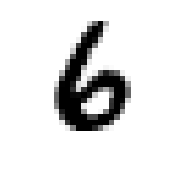

In [11]:
ind = random.randint(0, TEST_SIZE)
x = train_x[ind]
y = train_y_5[ind]

plot_digit(train_x[ind])
y_hat = sgd_clf.predict([x])[0]

print(f'is_5: {y}, pred_is_5: {y_hat}')

### Measuring Accuracy using k-fold cross-validation

In [12]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, train_x, train_y_5, cv=3, scoring='accuracy')

array([0.95035, 0.96035, 0.9604 ])

### Training a baseline dummy classifier to check naive predictions

In [13]:
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier()
dummy_clf.fit(train_x, train_y_5)

DummyClassifier()

In [14]:
cross_val_score(dummy_clf, train_x, train_y_5, cv=3, scoring='accuracy')

array([0.90965, 0.90965, 0.90965])

In [16]:
from sklearn.model_selection import cross_val_predict
train_y_pred = cross_val_predict(sgd_clf, train_x, train_y_5)
print(len(train_y_pred))

60000


In [17]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(train_y_5, train_y_pred)
cm

array([[53115,  1464],
       [  916,  4505]])

#### Confusion matrix:

||Predicted Negative|Predicted Positive|
|-|---------|-----------|
|Actual Negative|True Negative|False Positive|
|Actual Positive|False Negative|True Positive|

#### Precision is the percent of predicted positives that were true
$$
Precision = \frac{TP}{TP + FP}
$$

#### Recall is the percentage of actual positives which were correctly classified
$$
Recall = \frac{TP}{TP + FN}
$$

In [18]:
from sklearn.metrics import precision_score, recall_score

precision = precision_score(train_y_5, train_y_pred)
recall = recall_score(train_y_5, train_y_pred)

print(f'{precision = }, {recall = }')

precision = 0.7547327860613168, recall = 0.8310274857037447


In [19]:
y_scores = cross_val_predict(sgd_clf, train_x, train_y_5, cv=3, method='decision_function')
y_scores

array([  1200.93051237, -26883.79202424, -33072.03475406, ...,
        13272.12718981,  -7258.47203373, -16877.50840447], shape=(60000,))

In [21]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(train_y_5, y_scores)

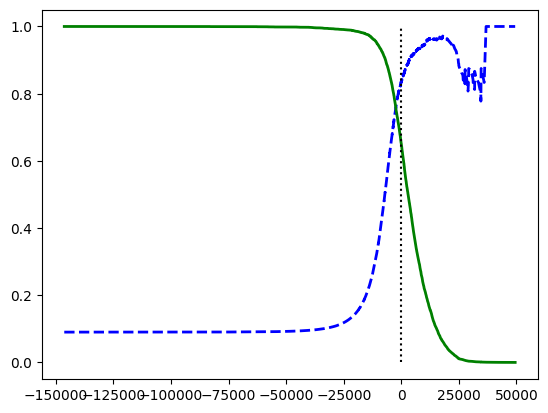

In [27]:
threshold = 0

plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
plt.vlines(threshold, 0, 1.0, "k", "dotted", label="threshold")
plt.show()

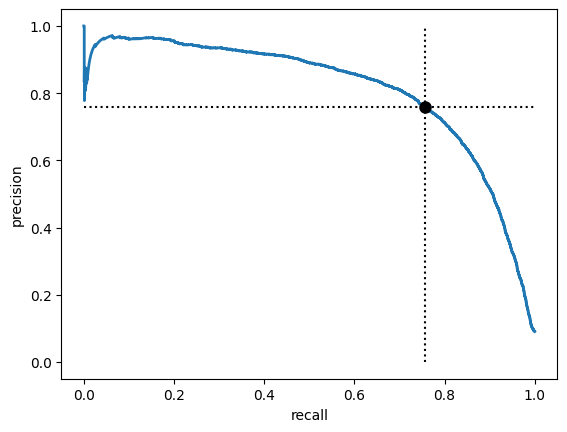

In [55]:
plt.plot(recalls, precisions, linewidth=2, label="Precision/Recall curve")
plt.xlabel('recall')
plt.ylabel('precision')

min_dif = 1000000
pre = -1
rec = -1
for p, r in zip(precisions, recalls):
    if(abs(p - r) < min_dif):
        min_dif = abs(p - r)
        pre = p
        rec = r

plt.vlines(rec, 0, 1.0, "k", "dotted", label="threshold")
plt.hlines(pre, 0, 1.0, "k", "dotted", label="threshold")
plt.plot(rec, pre, 'ok', markersize=8)

plt.show()

## Training a multiclass classifier

In [57]:
from sklearn.svm import SVC

svm_clf = SVC(random_state=42)
train_size = 5000
svm_clf.fit(train_x[:train_size], train_y[:train_size])

SVC(random_state=42)

y_hat = 3, y = 3
[[ 3.83583131 -0.28630347  8.27179122  9.30431246  2.74622676  6.2391604
   4.86599142  0.71129415  7.21779879  1.78013653]]


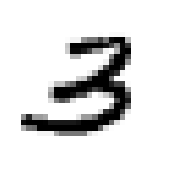

In [67]:
ind = random.randint(0, train_size)
x, y = train_x[ind], train_y[ind]

plot_digit(x)
y_hat = svm_clf.predict([x])
print(f'y_hat = {y_hat[0]}, y = {y}')

probs = svm_clf.decision_function([x])
print(probs)